# sklearnの確認問題

## 必要モジュールのインポート

この問題で使うモジュールをインポートします。

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

import pandas as pd

## 前準備




### データの読み取り
scikit-learnから提供される`iris`というデータセットを読み込みます。

In [14]:
from sklearn.datasets import load_iris
iris = load_iris()

#説明変数の読み取り
data = iris.data
feature_names = iris.feature_names
df_data = pd.DataFrame(data=data, columns=feature_names)

#目的変数の読み取り
target = iris.target
target_names = iris.target_names
df_target = pd.DataFrame(data=target, columns=['target'])


x = df_data
y = df_target

### 問1. 説明変数の把握

1.1. `df_data` の先頭五行を表示してください。

In [30]:
df_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


1.2. `df_data` の行数と列数を表示しましょう。

In [16]:
df_data.shape

(150, 4)

1.3. `df_data` の各列の `mean`, `count`, `std` などの基本特徴量を表示しましょう。


In [17]:
df_data.mean(),df_data.count(),df_data.std()

(sepal length (cm)    5.843333
 sepal width (cm)     3.057333
 petal length (cm)    3.758000
 petal width (cm)     1.199333
 dtype: float64,
 sepal length (cm)    150
 sepal width (cm)     150
 petal length (cm)    150
 petal width (cm)     150
 dtype: int64,
 sepal length (cm)    0.828066
 sepal width (cm)     0.435866
 petal length (cm)    1.765298
 petal width (cm)     0.762238
 dtype: float64)

1.4. `df_data` に欠損値がないかを確認しましょう。

In [18]:
has_true = df_data.any().any()

if has_true:
    print("欠損値あり")
else:
    print("欠損値なし")

欠損値あり


### 問2. 目的変数の把握

2.1. `df_target` のうち、ランダムに 10 行表示しましょう。

目的変数の数字はそれぞれ、

- 0 が `setosa`（ヒオウギアヤメ）
- 1 が `versicolor`（ブルーフラッグ）
- 2 が `virginica`（バージニカ）

を指しています。


In [50]:
random_sample = df_target.sample(n = 10,random_state = 1)
random_sample





,target
14,0
98,1
75,1
16,0
131,2
56,1
141,2
44,0
29,0
120,2


### 問3. データの可視化（Extra）

3.1. x 軸を petal length (cm)、y 軸を petal width (cm)にして散布図を作成しましょう。 ただし、目的変数に応じて点の色と形を変更してください。

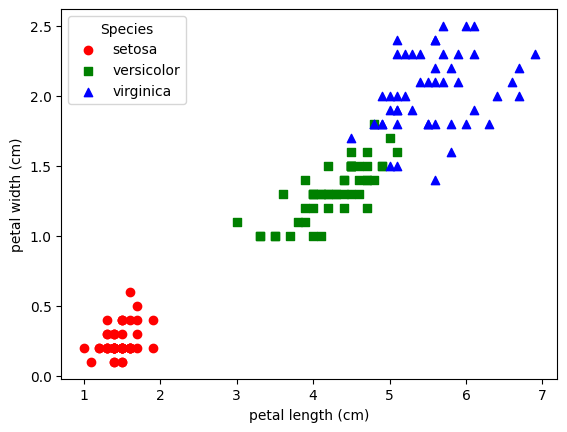

In [51]:
import matplotlib.pyplot as plt

# 目的変数に応じた色と形のマッピング
colors = ['red', 'green', 'blue']  # クラスごとの色
markers = ['o', 's', '^']  # クラスごとのマーカー

# クラスごとにデータを分割
for class_num, color, marker in zip(range(3), colors, markers):
    x_class = x[y['target'] == class_num]
    plt.scatter(x_class['petal length (cm)'], x_class['petal width (cm)'], c=color, marker=marker, label=target_names[class_num])

# グラフの設定
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.legend(loc='best', title='Species')

# グラフを表示
plt.show()


## 機械学習


### 問4. データの分割

4.1. iris データを 4:1 に分割して、80% を学習データとして 20% をテストデータとしてください。

ただし、分割した後の変数名は以下の通りにしてください。

| 変数名  |      内容      |
| :-----: | :------------: |
| x_train | 学習用の説明変数 |
| x_test | テスト用の説明変数 |
| y_train | 学習用の目的変数 |
| y_test | テスト用の目的変数 |

学習データでモデルの学習を行い、テストデータでモデルの評価を行います。


In [41]:




from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)

4.2. 本当に4:1に分割できているか確認しましょう。

In [42]:
print("x_trainのサイズ:", x_train.shape)
print("x_testのサイズ:", x_test.shape)
print("y_trainのサイズ:", y_train.shape)
print("y_testのサイズ:", y_test.shape)


x_trainのサイズ: (120, 4)
x_testのサイズ: (30, 4)
y_trainのサイズ: (120, 1)
y_testのサイズ: (30, 1)


### 問5. 学習

5.1. RandamForest の学習モデルのインスタンスを生成しましょう。

In [44]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100,random_state=0)

5.2. `x_train` と `y_train` を用いて、モデルを学習させましょう。

In [45]:
rf_model.fit(x_train,y_train)

c:\Users\kai\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(random_state=0)

### 問6. 推論


6.1. 学習したモデルに `x_test` を入力して予測をしましょう。

In [48]:
y_pred = rf_model.predict(x_test)

6.2. 予測結果と `y_test` に対して、`accuracy` を計算することでモデルを評価しましょう。

In [49]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test,y_pred)
print("正解率",accuracy)

正解率 1.0


実は、iris データセットはかなり簡単な分布をしているので、正解率はほぼ 100% になったと思います。